In [21]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop


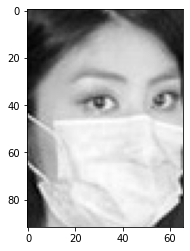

In [23]:
import matplotlib.pyplot as plt

datadir = "D:\Python projects\Machine Learning\Machine_learning Project 1\dataset"
CATEGORIES = ["with_mask","without_mask"]


for category in CATEGORIES:
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [25]:
print(img_array.shape)

(92, 66)


<function matplotlib.pyplot.show(close=None, block=None)>

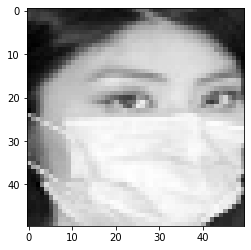

In [27]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show

In [28]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(datadir, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()        

In [31]:
print(len(training_data))

1384


In [34]:
import random

random.shuffle(training_data)

In [44]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
1
0
0
1
0
0


In [45]:
X= []
y = []

In [46]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [53]:
y[:5]

[0, 0, 0, 0, 1]

In [54]:
X[0]

array([[[154],
        [164],
        [145],
        ...,
        [ 43],
        [ 43],
        [ 43]],

       [[152],
        [162],
        [137],
        ...,
        [ 45],
        [ 42],
        [ 46]],

       [[158],
        [162],
        [133],
        ...,
        [ 42],
        [ 42],
        [ 43]],

       ...,

       [[141],
        [115],
        [101],
        ...,
        [ 27],
        [ 25],
        [ 24]],

       [[146],
        [137],
        [ 96],
        ...,
        [ 30],
        [ 28],
        [ 25]],

       [[149],
        [150],
        [129],
        ...,
        [ 29],
        [ 25],
        [ 24]]], dtype=uint8)

In [56]:
import pickle

pickle_out = open("mask_data.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

In [52]:
y[:5]

[0, 0, 0, 0, 1]

In [57]:
pickle_out = open("mask_labels.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()